# Applied Statistics Tasks

**Linda Grealish**

***

## Table of contents
 * [Task 1](#task-1)
 * [Task 2](#task-2)
 * [Task 3](#task-3)
 * [Task 4](#task-4)


<a id="task-1"></a>
## Task 1

Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea.
Six have the milk in first and the other six having tea in first.
A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it.
You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.

Calculate, using Python, the probability that they select the correct six cups.
Here you should assume that they have no special powers in figuring it out, that they are just guessing.
Remember to show and justify your workings in code and MarkDown cells.

Suppose, now, you are willing to accept one error.
Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups.
Calculate the probability, assuming they have no special powers, that the person makes at most one error.

Would you accept two errors? Explain.

In [ ]:
import math

In [ ]:
# Number of cups in total
no_cups = 12

# Number of cups of tea with milk in first.
no_cups_milk_first = 6

# Number of cups of tea with tea in first.
no_cups_tea_first = 6


In [ ]:
# Number of ways of selecting four cups from eight.
ways = math.comb(no_cups, no_cups_milk_first)

# Show.
ways

In [ ]:
# Define function to calculate number of possible combinations
def number_combinations(n, k):
  return math.comb(n, k)


In [ ]:
# Calculate total number of combinations possible
total_ways = number_combinations(12, 6)
total_ways
print(f'The total number of combinations is {total_ways}')

In [ ]:
# Calculate the probability of guessing correctly
p_correct_selection = 1 / total_ways
p_correct_selection

In [ ]:
# Output the result
print(f"Total number of ways to select 6 cups from 12: {total_ways}")
print(f"Probability of selecting the correct 6 cups: {p_correct_selection:.10f}")

In [ ]:
# Probability of selecting exactly 6 correct cups (no errors)
p_exact_6_correct = 1 / total_ways

# Probability of selecting exactly 5 correct cups (1 error)
# Choose 5 correct from 6, and 1 incorrect from 6
ways_to_choose_5_correct = number_combinations(6, 5)
ways_to_choose_1_incorrect = number_combinations(6, 1)
p_exact_5_correct = (ways_to_choose_5_correct * ways_to_choose_1_incorrect) / total_ways

# Total probability of making at most 1 error
p_at_most_1_error = p_exact_6_correct + p_exact_5_correct


In [ ]:
# Output the result
print(f"Probability of selecting exactly 6 correct cups (no errors): {p_exact_6_correct:.10f}")
print(f"Probability of selecting exactly 5 correct cups (1 error): {p_exact_5_correct:.10f}")
print(f"Total probability of making at most 1 error (0 or 1 error): {p_at_most_1_error:.10f}")

In [ ]:
# Probability of selecting exactly 6 correct cups (no errors)
p_exact_6_correct = 1 / total_ways

# Probability of selecting exactly 4 correct cups (2 error)
# Choose 4 correct from 6, and 2 incorrect from 6
ways_to_choose_4_correct = number_combinations(6, 4)
ways_to_choose_2_incorrect = number_combinations(6, 2)
p_exact_4_correct = (ways_to_choose_4_correct * ways_to_choose_2_incorrect) / total_ways

# Total probability of making at most 2 error
p_at_most_2_errors = p_exact_6_correct + p_exact_5_correct + p_exact_4_correct

In [ ]:
# Output the result
print(f"Probability of selecting exactly 6 correct cups (no errors): {p_exact_6_correct:.10f}")
print(f"Probability of selecting exactly 5 correct cups (1 error): {p_exact_5_correct:.10f}")
print(f"Probability of selecting exactly 4 correct cups (2 errors): {p_exact_4_correct:.10f}")
print(f"Total probability of making at most 2 errors (0, 1 or 2 errors): {p_at_most_2_errors:.10f}")

In [ ]:
# Assuming a significance level of 0.05 for evaluating the null
alpha = 0.05

In [ ]:
# Testing the null hypothesis based on allowing at most 1 error

if p_at_most_1_error < alpha:
    print("Based on the lady making at most 1 error, the null hypothesis can be rejected.")
else:
    print("Based on the lady making at most 1 error, the null hypothesis cannot be rejected.")

In [ ]:
# Testing the null hypothesis based on allowing at most 2 errors

if p_at_most_2_errors < alpha:
    print("Based on the lady making at most 2 errors the null hypothesis can be rejected.")
    
else:
    print("Based on the lady making at most 2 errors the null hypothesis cannot be rejected.")



### Probabilities 
1. **All 6 cups guessed correctly**

      Probability $\approx $ 0.00108 (0.108%)  
      
      This is highly unlikely, indicating that the person most likely has a skill.  This could be determined further by running the test multiple times.

2. **At most 1 error (either 5 or 6 correct)**

      Probability $\approx $ 0.04004 (4%)  

      The probability of this, although much higher than the probability of guessing all 6 correctly the liklihood is still below the generally accepted significance level of 5%.  It is still unlikely but does allow for some error by someone with genuine skill.

3. **At most 2 errors (either 4, 5 or 6 correct)**

      Probability $\approx $ 0.28354 (28.354%) 

      This is a significant increase compared to the acceptance of 1 or no errors and is above the significance level set at 5%.  This would make it far easier for someone without any skill and simply guessing to pass the test, diminishing the tests integrity.





## Conclusion

Accepting 2 errors would make the test less rigorous, as the probability of passing increases substantially, making it much easier for someone without any skill to simply guess resulting in a false positive.  For this reason I would not accept 2 errors.

## References

https://en.wikipedia.org/wiki/Lady_tasting_tea

https://www.physiotutors.com/wiki/alpha-level/

https://github.com/ianmcloughlin/2425_applied_statistics

https://en.wikipedia.org/wiki/Statistical_significance

https://www.nbi.dk/~petersen/Teaching/Stat2019/Notes/Fisher_ExactTest_LadyTastingTea.pdf

https://stackoverflow.com/questions/43025450/how-can-i-type-approximate-equal-sign-in-markdown-jupyter




<a id="task-2"></a>
## Task 2

In this task you will assess whether `numpy.random.normal()` properly generates normal values.
To begin, generate a sample of one hundred thousand values using the function with mean `10.0` and standard deviation `3.0`.

Use the `scipy.stats.shapiro()` function to test whether your sample came from a normal distribution.
Explain the results and output.

Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.

In [27]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [28]:
# Define parameters
mean = 10.0
std_dev = 3.0
n = 100000

Let's generate our sample data with 100,000 values and using the given parmeters for mean and standard deviation

In [ ]:
# Generate our random normal sample based on above parameters using numpy
sample = np.random.normal(mean, std_dev, n)

#Show
sample

array([ 7.4762485 , 14.60127875,  6.31146883, ...,  4.56301701,
        7.4325021 , 11.28603083])

In [41]:
# Run the Shapiro test on the generated sample
shapiro_test = stats.shapiro(sample)

print("Shapiro-Wilk Test Results:")
print(f"The test statistic (W) is {shapiro_test.statistic}")
print(f"The p-value is {shapiro_test.pvalue}")

Shapiro-Wilk Test Results:
The test statistic (W) is 0.9999761581420898
The p-value is 0.8125271797180176


c:\Users\lgrealish\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## Explanation the Shapiro-Wilk test

The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.  The test returns a *test statistic value (W)* and a  *p-value*.  

- **Test Statistic (W)**
  
  This measures how well the sample data matches the properties of a normal distribution.  This is a value between 0 and 1, where values closer to 1 indicating that the sample most liekly follow the normal distribution.

- **p-value (p)**

  This value determines the statistical significance of the test.  
  
  A low value (*p* <0.05) suggests that the sample significantly deviates from a normal distribution and you can reject the null hypothesis.

  A high value (*p*$\geq $ 0.05) suggests that the sample does not significantly deviate from a normal distribution you cannot reject the null hypothesis.


The results of the Shapiro-Wilk test for the randomly generated data *sample* we can see that the test statistic is $\approx $ 0.99997, suggesting that the data closely matches a normal distribution.  The p-value of $\approx $ 0.81252is much greater than the generally accepted significance level of 0.05 and therefore we can accept the null hypothesis as there is no eveidence to suggest that the data deviates from a normal distribution.


We can also display the data on a histogram with normal distribution probability density function on top of it.  

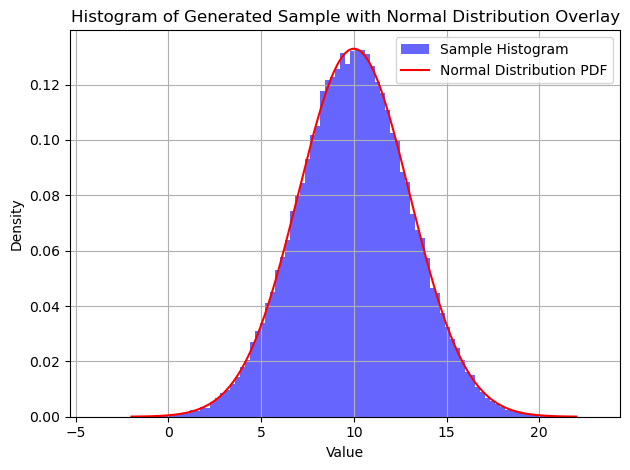

In [ ]:
# Plot histogram of the generated sample and overlay with the pdf

plt.hist(sample, bins=100, density=True, alpha=0.6, color='b', label='Sample Histogram')
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 100000)
pdf = stats.norm.pdf(x, loc=mean, scale=std_dev)
plt.plot(x, pdf, 'r', label='Normal Distribution PDF')

plt.title('Histogram of Generated Sample with Normal Distribution Overlay')
plt.xlabel('Value')
plt.ylabel('Density')
plt.tight_layout()
plt.grid()
plt.legend()
plt.show()


Another way to check if the data is normally distributed id the use of a Q-Q plot (quantile-quantile plot).  Q-Q plots are a useful tool to visually show the shape of the data compared with the shape of a probability distribution function.  It can highlight normaility as well as skewness.

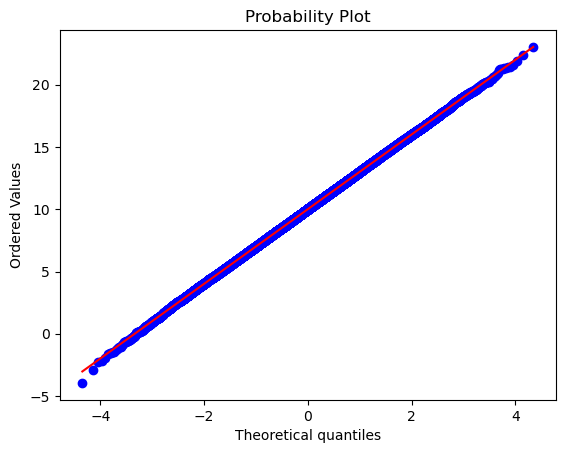

In [42]:
# Create a probability plot for generated sample

fig, ax = plt.subplots()

stats.probplot(sample, dist='norm', plot = ax);


The Q-Q plot shows the data very closely follows the normal distribution.

## Conclusion

Based on the results of the Shaprio-Wilk test as well as the histograms and Q-Q plot, there is no evidence that the randomly generated sample is not normally distributed.

## References

https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

https://statistics.laerd.com/spss-tutorials/testing-for-normality-using-spss-statistics.php#:~:text=If%20the%20Sig.,deviate%20from%20a%20normal%20distribution.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test

https://www.kaggle.com/discussions/general/432129

https://builtin.com/data-science/shapiro-wilk-test

https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html



<a id="task-3"></a>
## Task 3

Consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.

| Patient ID |  0 |  1 |  2 |  3 |  4 |  5 |  6 |  7 |  8 |  9 |
|:-----------|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|
| Before     | 63 | 68 | 70 | 64 | 74 | 67 | 70 | 57 | 66 | 65 |
| After      | 64 | 64 | 68 | 64 | 73 | 70 | 72 | 54 | 61 | 63 |

Calculate the t-statistic based on this data set, using Python.
Compare it to the value given by `scipy.stats`.
Explain your work and list any sources used.

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns


Formula for Paired T-Test
The t-statistic for a paired test is calculated as:

$$t = \frac{\bar{d}}{s_d / \sqrt{n}} $$

where:

\begin{align*}
\bar{d} & = \text{mean of the differences between paired samples} \\
s_d & = \text{standard deviation of the differences} \\
n & = \text{number of pairs}
\end{align*}


In [ ]:
# Create a pandas dataframe
data = {'patient_id': [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'before':[ 63, 68, 70, 64, 74, 67, 70, 57, 66, 65],
        'after': [64, 64, 68, 64, 73, 70, 72, 54, 61, 63]}

df = pd.DataFrame(data)

In [ ]:
# Show the before and after arrays on a strip plot
#sns.stripplot([before, after])
sns.stripplot([df.before, df.after])

In [ ]:
# Show the before and after arrays on a boxplot
sns.boxplot([df.before, df.after])

In [ ]:
# Perform paired t-test to calculate the t-statistic and p-value using scipy.stats

stats.ttest_ind(df.before, df.after)

In [ ]:
# Calculate the mean value of each array
mean1, mean2 = np.mean(df.before), np.mean(df.after)

print(mean1)

print(mean2)


In [ ]:
# Calculate the standard deviation of each array
std1, std2 = np.std(df.before, ddof=1), np.std(df.after, ddof=1)

In [ ]:
# Calculate the standard error of the mean for each array
se1, se2 = stats.sem(df.before), stats.sem(df.after)

In [ ]:
# Calculate the standard error difference between the samples
sed = np.sqrt(se1**2.0 + se2**2.0)

In [ ]:
# Calculate the t statistic
t_stat = (mean1 - mean2) / sed

t_stat

In [ ]:
# Run an independant samples t-test on both arrays
stats.ttest_ind(df.before, df.after)

In [ ]:
# Run a paired t-test on both arrays
stats.ttest_rel(df.before, df.after)

## References

https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/

https://www.geeksforgeeks.org/scipy-stats-sem-function-python/

https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/paired-sample-t-test/

https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/box-plot-review


<a id="task-4"></a>
## Task 4

In this test we will estimate the probability of committing a type II error in specific circumstances.
To begin, create a variable called `no_type_ii` and set it to `0`.

Now use a loop to perform the following test 10,000 times.

1. Use `numpy.random.normal` to generate three samples with 100 values each. Give each a standard deviation of `0.1`. Give the first sample a mean of `4.9`, the second a mean of `5.0`, and the third a mean of `5.1`. 

2. Perform one-way anova on the three samples and add `1` to `no_type_ii` whenever a type II error occurs.

Summarize and explain your results.